In [39]:
 import sys
 import warnings
 import matplotlib.pyplot as plt
 import numpy as np
 import pandas as pd
 import seaborn as sns
 from matplotlib import colors
 from sklearn.cluster import AgglomerativeClustering
 from sklearn.cluster import KMeans
 from sklearn.decomposition import PCA
 from sklearn.preprocessing import LabelEncoder
 from sklearn.preprocessing import StandardScaler
 from yellowbrick.cluster import KElbowVisualizer

 if not sys.warnoptions:
    warnings.simplefilter("ignore")
 np.random.seed(42)

In [13]:
 data = pd.read_csv("D:\KGEC MCA 4th SEM\Major Project\marketing_campaign.csv", sep="\t")
 print("No. of datapoints:", len(data))
 print("No. of columns:", len(df.columns))
 data.head()

No. of datapoints: 2240
No. of columns: 29


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
 # Removing null values
 data = data.dropna()
 print(f"After removing the null values data contains {len(data)}")

After removing the null values data contains 2216


In [16]:
 data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
 dates = [i.date() for i in data["Dt_Customer"]]
 #Dates of the newest and oldest recorded customer
 print("The newest customer's enrolment date in the records:", max(dates))
 print("The oldest customer's enrolment date in the records:", min(dates))

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [18]:
 #Created a feature "Customer_For"
 dates_max = max(dates)  #taking it to be the newest customer
 days = [dates_max - i for i in dates]
 data["Customer_For"] = days
 data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [19]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"])
print("Total categories in the feature Education:\n", data["Education"].values)

Total categories in the feature Marital_Status:
 0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2216, dtype: object
Total categories in the feature Education:
 ['Graduation' 'Graduation' 'Graduation' ... 'Graduation' 'Master' 'PhD']


In [20]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2.216000e+03
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,3.054423e+16
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000e+00
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.555200e+16
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,3.071520e+16
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,4.570560e+16
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,6.039360e+16
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,1.749036e+16


In [21]:
 #Feature Engineering
 #Age of customer today
# Assuming these are the correct column names
# Assuming these are the correct column names
data["Age"] = 2021 - data["Year_Birth"]
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]


#Deriving living situation by marital status"Alone"
 data["Living_With"] = data["Marital_Status"].replace(
    {"Married": "Partner", "Together": "Partner", "Absurd": "Alone", "Widow"
     "Divorced": "Alone", "Single": "Alone", })
#Feature indicating total children living in the household
 data["Children"] = data["Kidhome"] + data["Teenhome"]
# Feature for total members in the household
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2})

 #Feature pertaining parenthood
 data["Is_Parent"] = np.where(data.Children > 0, 1, 0)
 #Segmenting education levels in three groups
 data["Education"] = data["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Postgraduate",
    "PhD": "Postgraduate"
})

 #For clarity
 data = data.rename(
    columns={"MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts"
             "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"})
 #Dropping some of the redundant features
 to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue"]
data = data.drop(to_drop, axis=1)


In [22]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073105,0.064079,0.013538,0.009477,0.150271,3.054423e+16,52.179603,569.437726,0.947202,0.714350
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.260367,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,569.277949,0.749062,0.451825
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.555200e+16,44.000000,62.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.071520e+16,51.000000,369.000000,1.000000,1.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.570560e+16,62.000000,970.000000,1.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,6.039360e+16,128.000000,2431.000000,3.000000,1.000000


In [42]:
# Initializing Color pallets
sns.set(rc={"axes.facecolor": "#edf9ff", "figure.facecolor": "#edf9ff"})
pallet = ["#2f2f68", "#6f729e", "#b1b2d6", "#c9c0b9", "#788a9f", "#60abf3"]
cmap = colors.ListedColormap(["#2f2f68", "#6f729e", "#D6B2B1", "#b1b2d6","#788a9f"])
pal = ["#2f2f68", "#c9c0b9", "#788a9f", "#60acf3"]

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

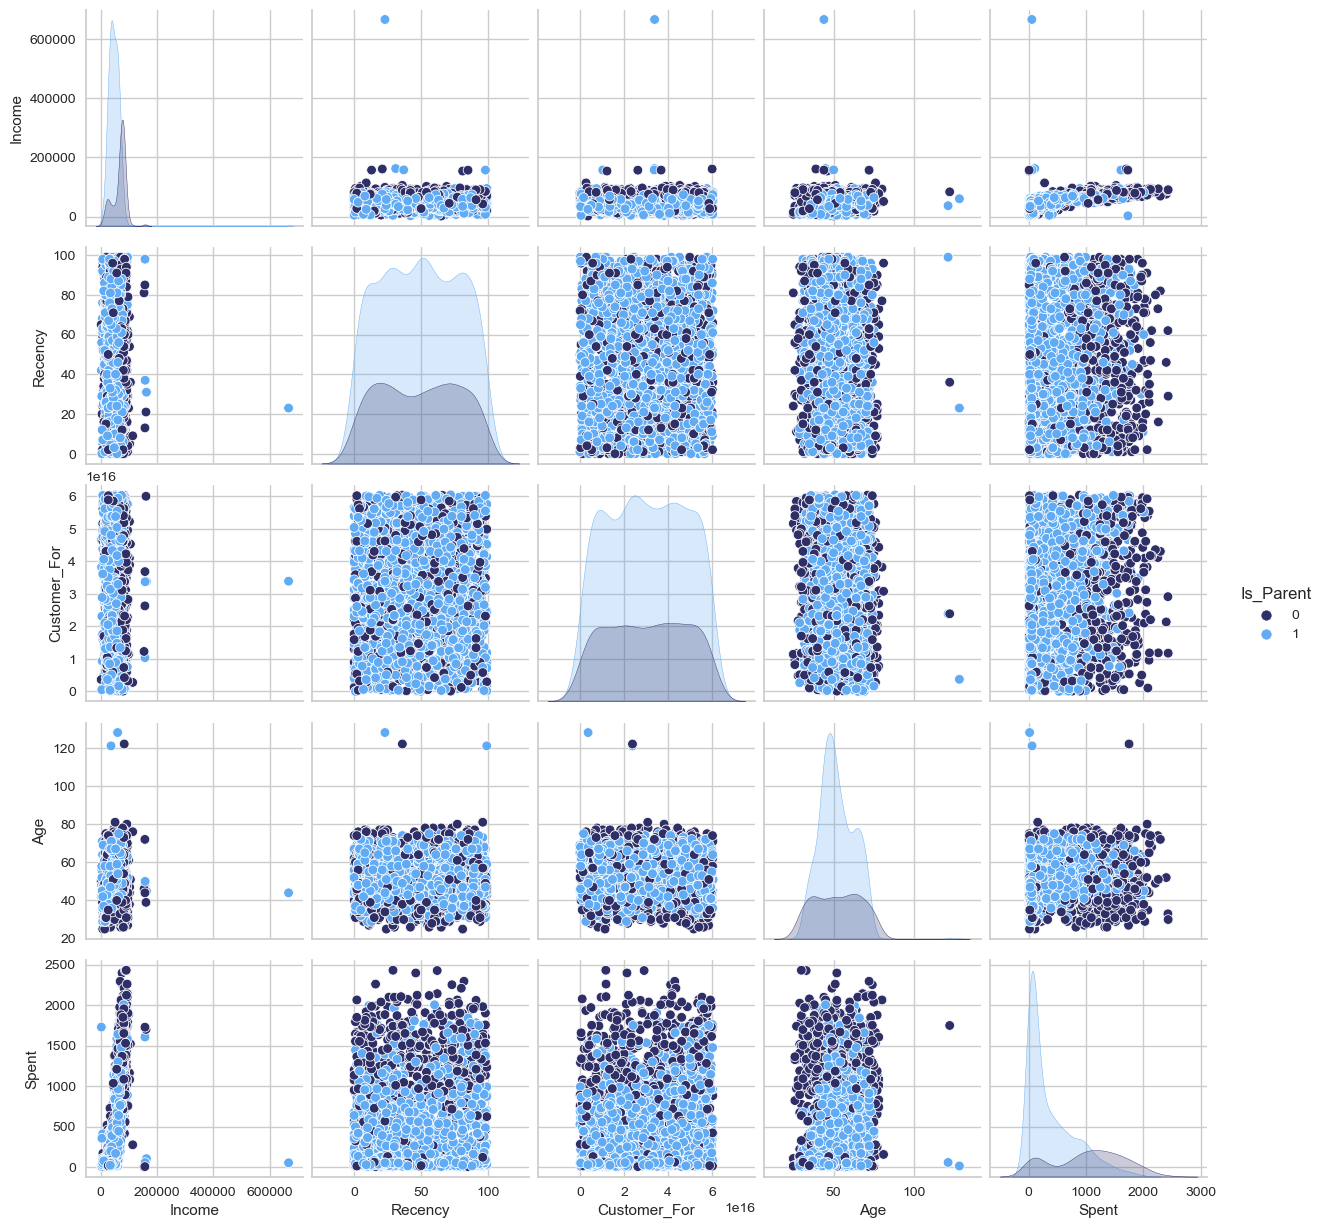

In [23]:
 # Plotting following features
 To_Plot = ["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
 print("Relative Plot Of Some Selected Features: A Data Subset")
 plt.figure()
 sns.pairplot(data[To_Plot], hue="Is_Parent", palette=(["#2f2f68", "#60abf3"]))
 plt.show()

In [24]:
 #Dropping the outliers by setting a cap on Age and income.
 data = data[(data["Age"] < 90)]
 data = data[(data["Income"] < 600000)]
 print(f"The total data-points after removing the outliers are: {len(data)}")

The total data-points after removing the outliers are: 2212


<Axes: >

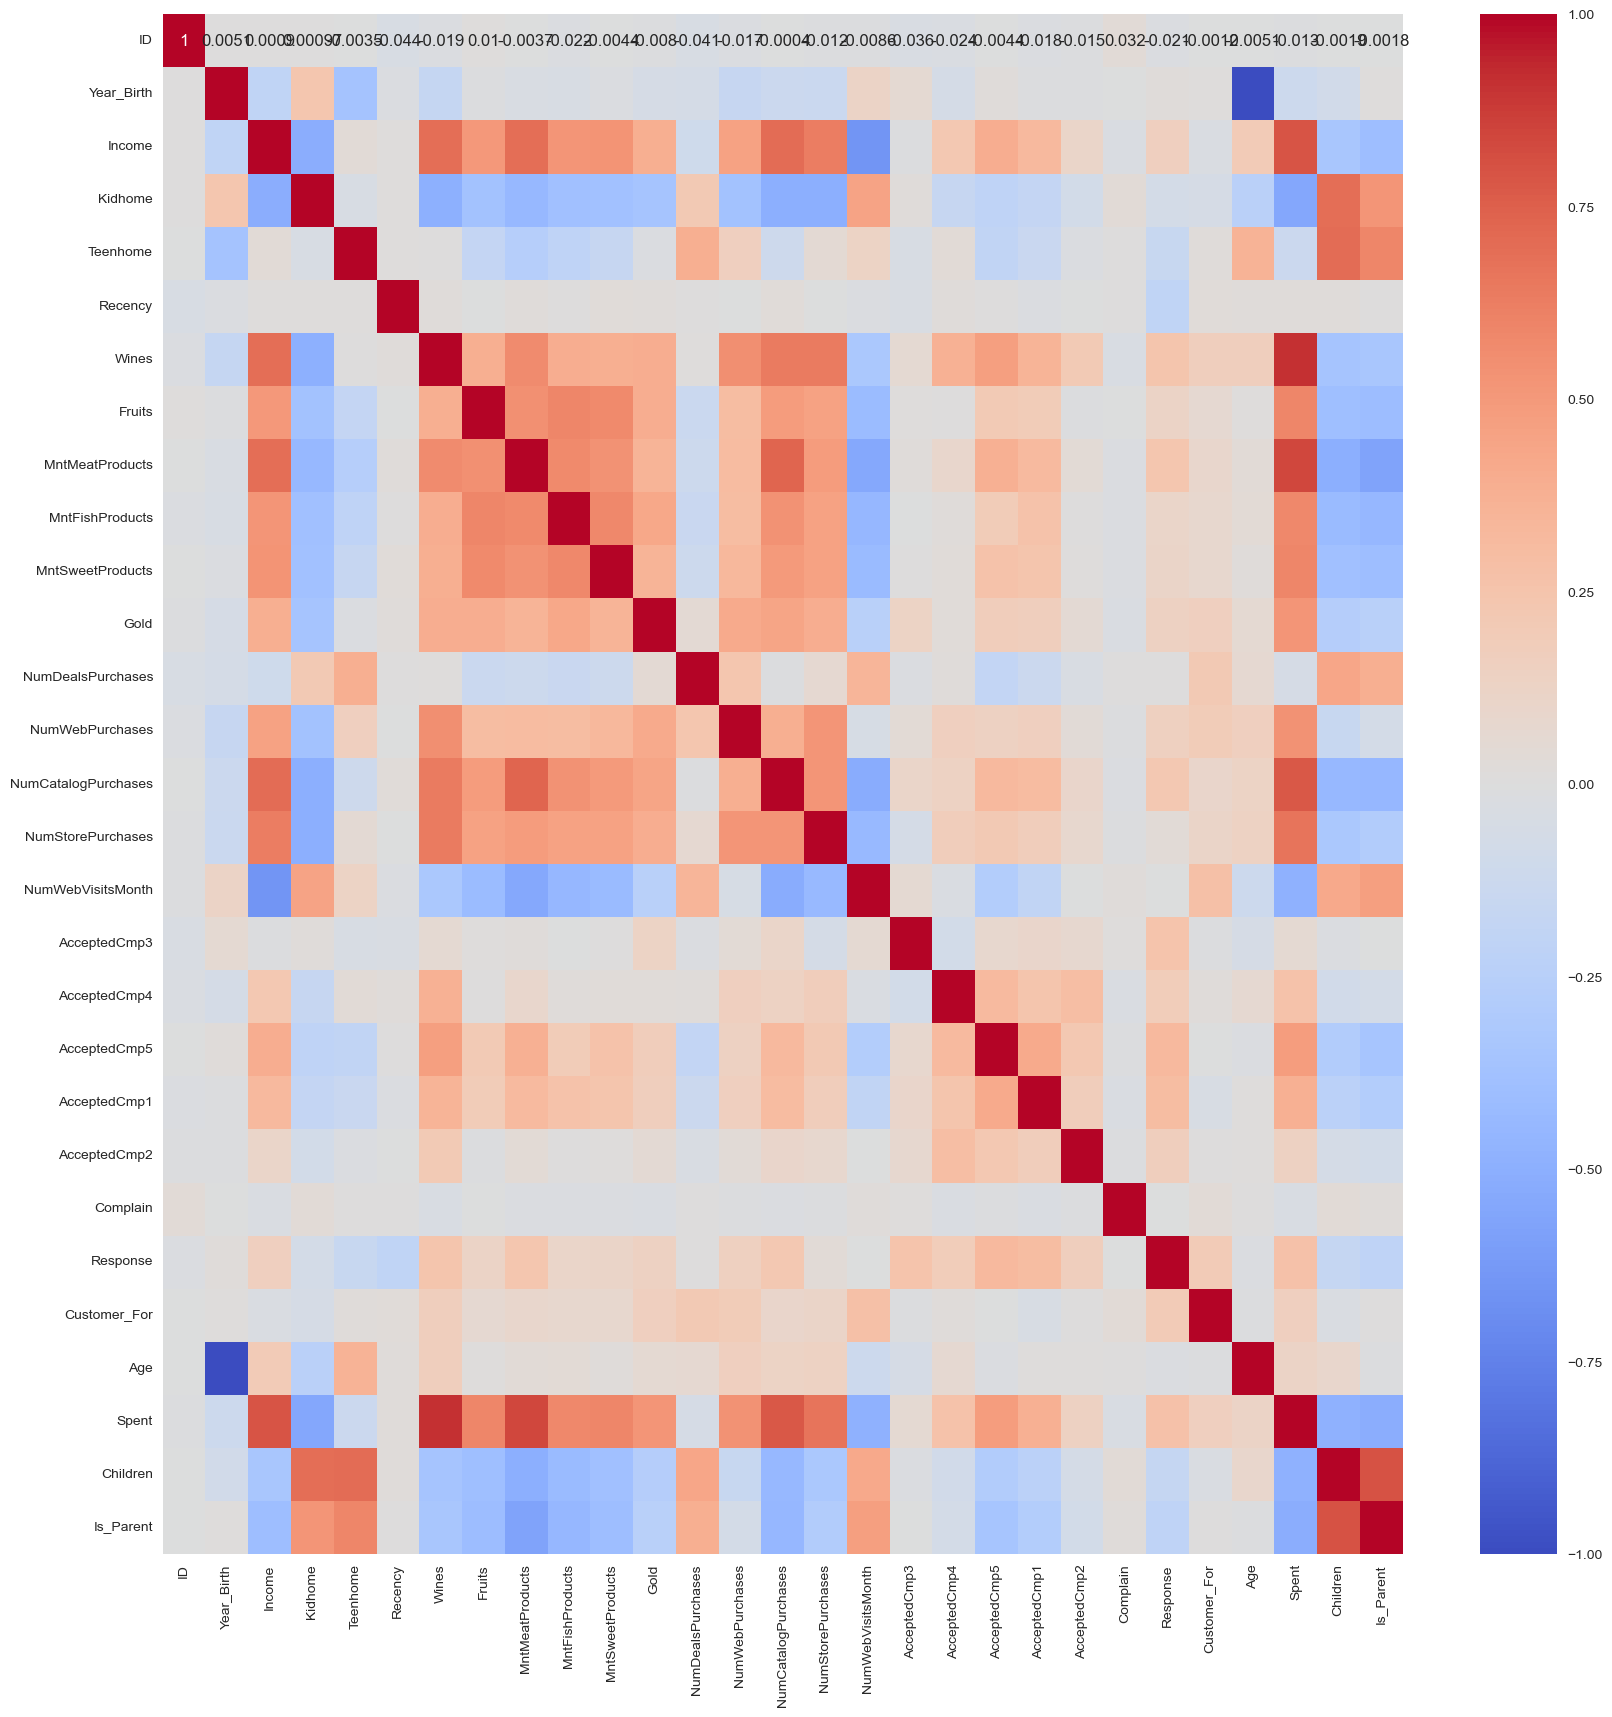

In [35]:
#correlation matrix
numeric_data = data.select_dtypes(include=[np.number]) # Select only numeric columns
cor_mat = numeric_data.corr() # Compute correlation matrix
# cor_mat = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', center=0)
# heatmap_plot


In [36]:
 # Get list of categorical variables
 s = (data.dtypes == 'object')
 object_cols = list(s[s].index)
 print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With', 'Family_Size']


In [40]:
 # Using Label Encoding to convert categorical data to numerical.
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[i].astype(str)  # Convert all values to strings
    data[i] = LE.fit_transform(data[i])
print("All features are now numerical")

All features are now numerical


In [43]:
 # Creating a copy of data
 data_copy = data.copy()
 # Creating a subset of dataframe by dropping the features on deals accepted and promotions
 cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1']
 data_copy = data_copy.drop(cols_del, axis=1)
 # Scaling
 scaler = StandardScaler()
 scaler.fit(data_copy)
 scaled_ds = pd.DataFrame(scaler.transform(data_copy), columns=data_copy.columns)
 print("All features are now scaled using standard scaler")


All features are now scaled using standard scaler


In [45]:
 #Initiating PCA to reduce dimentions aka features to 3
 pca = PCA(n_components=3)
 pca.fit(scaled_ds)
 pca_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1", "col2","col3"]))
 pca_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,2.569775e-17,2.825342,-5.632043,-2.586340,-0.771905,2.358926,7.481152
col2,2212.0,-3.854662e-17,1.735223,-4.492230,-1.395104,0.027272,1.353713,5.197498
col3,2212.0,8.191157e-17,1.408251,-4.661363,-0.909876,-0.027613,0.954439,4.894121


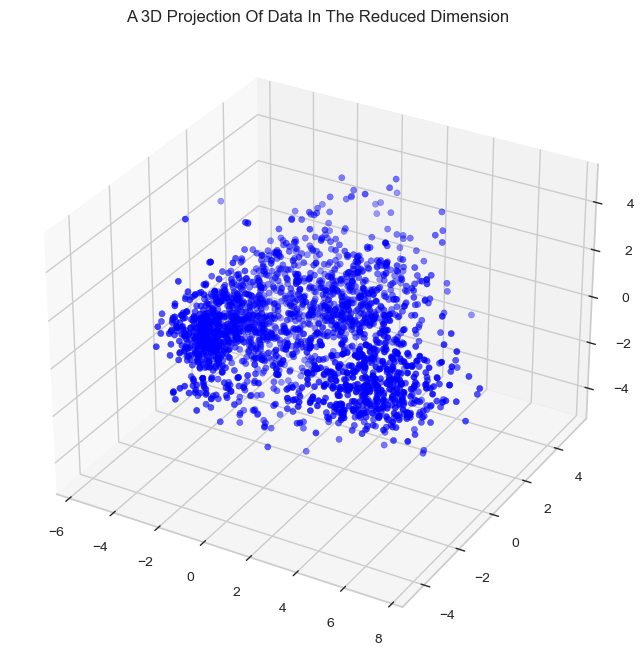

In [46]:
 # A 3D Projection Of Data In The Reduced Dimension
 x = pca_ds["col1"]
 y = pca_ds["col2"]
 z = pca_ds["col3"]
 # Plotting
 fig = plt.figure(figsize=(10, 8))
 ax = fig.add_subplot(111, projection="3d")
 ax.scatter(x, y, z, c="blue", marker="o")
 ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
 plt.show()

Clusetering 

Elbow Method to determine the number of clusters to be formed:


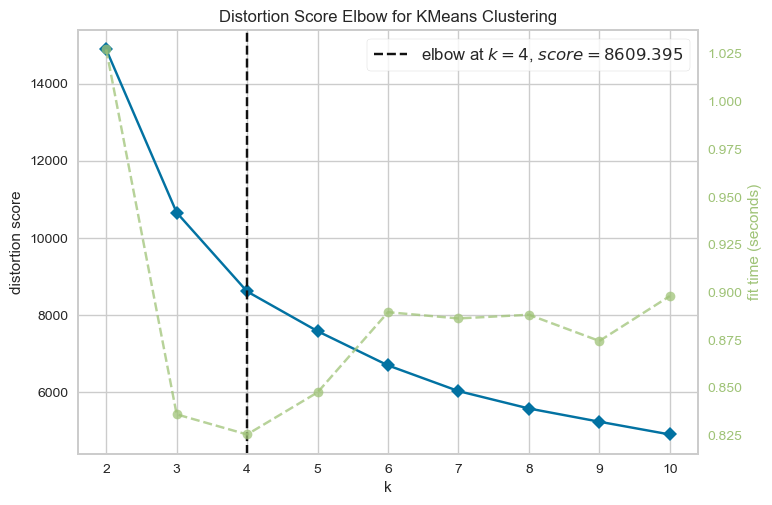

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
 # Quick examination of elbow method to find numbers of clusters to make.
 print('Elbow Method to determine the number of clusters to be formed:')
 Elbow_M = KElbowVisualizer(KMeans(), k=10)
 Elbow_M.fit(pca_ds)
 Elbow_M.show()

In [48]:
 #Initiating the Agglomerative Clustering model
 AC = AgglomerativeClustering(n_clusters=4)
 # fit model and predict clusters
 yhat_AC = AC.fit_predict(pca_ds)
 pca_ds["Clusters"] = yhat_AC
 #Adding the Clusters feature to the orignal dataframe.
 data["Clusters"] = yhat_AC

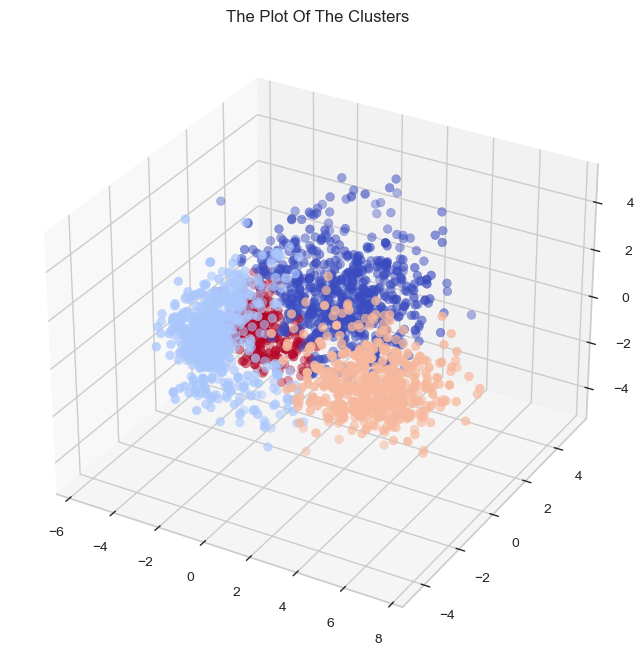

In [52]:
 #Plotting the clusters
 fig = plt.figure(figsize=(10, 8))
 ax = plt.subplot(111, projection='3d', label="bla")
 ax.scatter(x, y, z, s=40, c=pca_ds["Clusters"], marker='o', cmap='coolwarm')
 ax.set_title("The Plot Of The Clusters")
 plt.show()

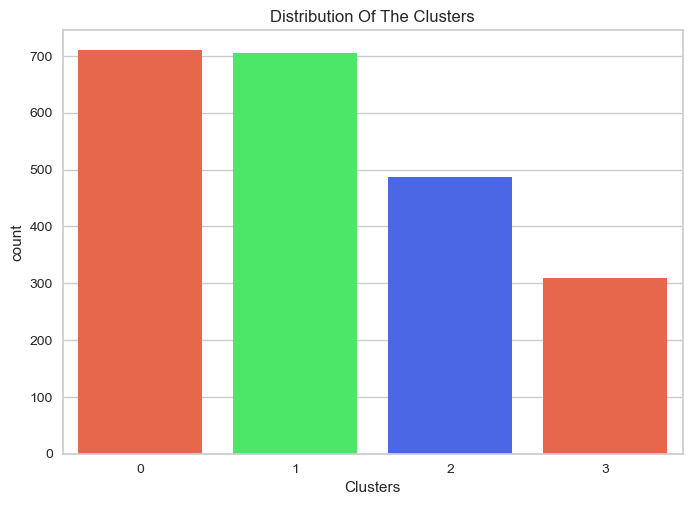

In [55]:
palette = ["#FF5733", "#33FF57", "#3357FF"]  # Example colors, you can customize as needed

# Create the countplot
fig = sns.countplot(x=data["Clusters"], palette=palette)
fig.set_title("Distribution Of The Clusters")
plt.show()

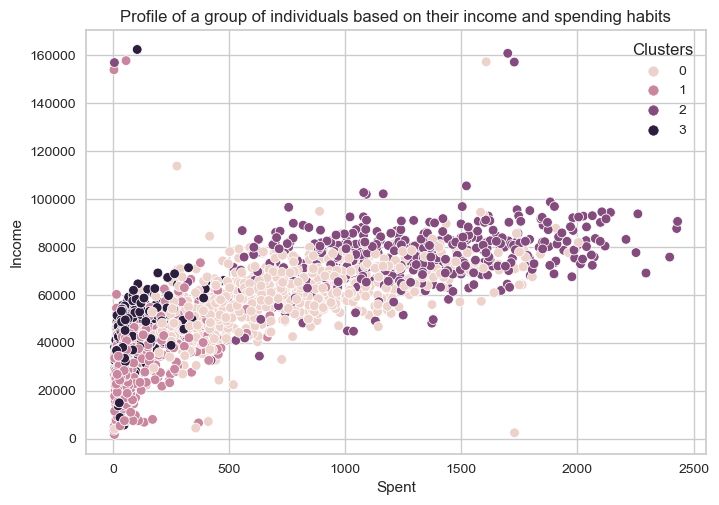

In [60]:
# Create the scatter plot
fig = sns.scatterplot(data=data, x="Spent", y="Income", hue="Clusters")
fig.set_title("Profile of a group of individuals based on their income and spending habits")
plt.legend(title='Clusters')
plt.show()

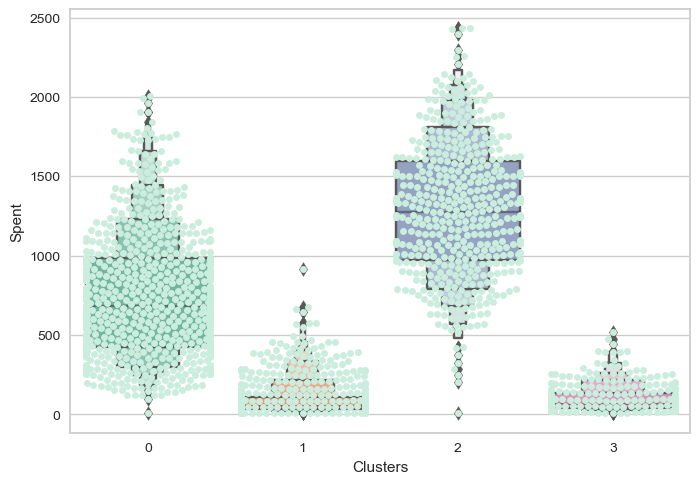

In [63]:
 # Define your own palette
palette = "Set2"

# Create the figure
plt.figure()

# Create the swarm plot
fig = sns.swarmplot(x=data["Clusters"], y=data["Spent"], color="#CBEDDD")

# Create the boxen plot
fig = sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=palette)

plt.show()

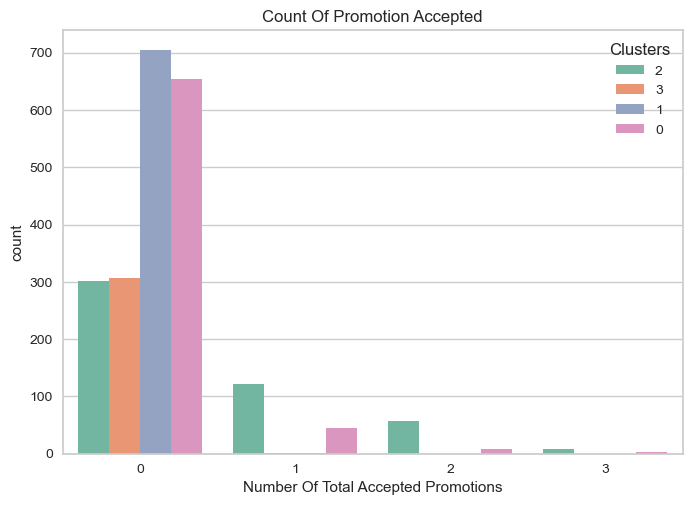

In [73]:
# Define your own palette or use a seaborn palette
palette = "Set2"  # Example of using a seaborn palette

# Creating a feature to get the sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp5"]

# Convert the "Clusters" column to strings
data["Clusters"] = data["Clusters"].astype(str)

# Plotting count of total campaign accepted.
plt.figure()
fig = sns.countplot(x=data["Total_Promos"], hue=data["Clusters"], palette=palette)
fig.set_title("Count Of Promotion Accepted")
fig.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

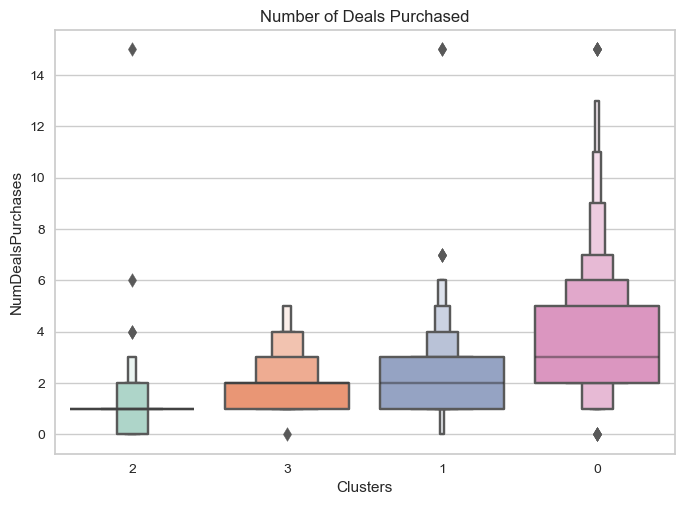

In [76]:
 palette = "Set2"  # Example of using a seaborn palette

# Plotting the number of deals purchased
plt.figure()
pl = sns.boxenplot(y=data["NumDealsPurchases"], x=data["Clusters"], palette=palette)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

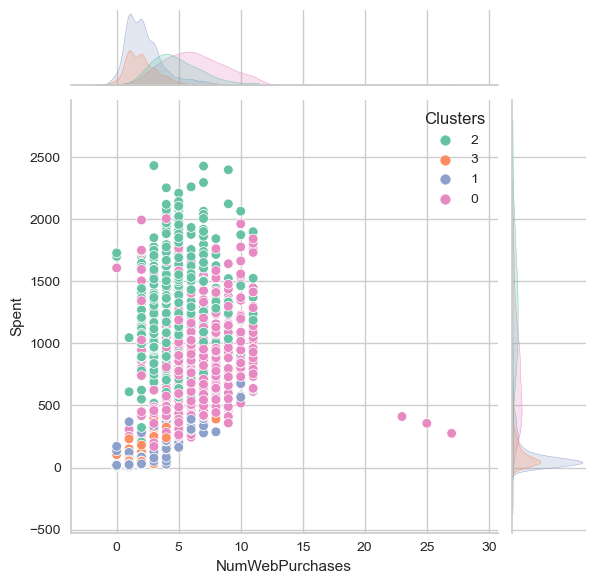

<Figure size 800x550 with 0 Axes>

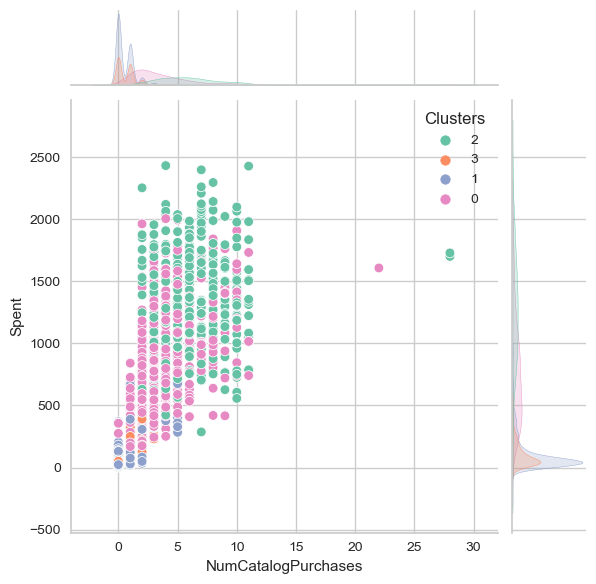

<Figure size 800x550 with 0 Axes>

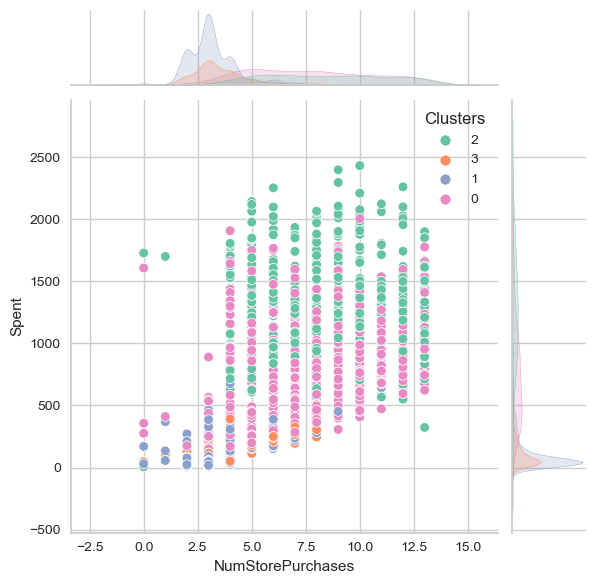

<Figure size 800x550 with 0 Axes>

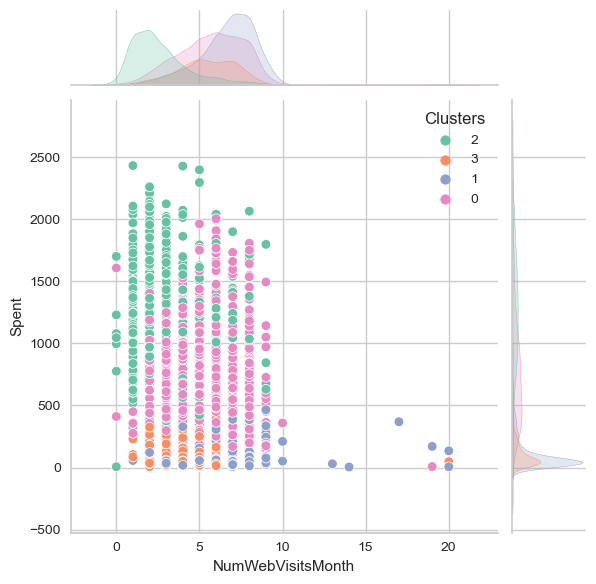

In [80]:
# Define your own palette or use a seaborn palette
palette = "Set2"  # Example of using a seaborn palette

# List of purchasing styles
purchases = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

# Loop through each purchasing style
for i in purchases:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue=data["Clusters"], palette=palette)
    plt.show()

<Figure size 800x550 with 0 Axes>

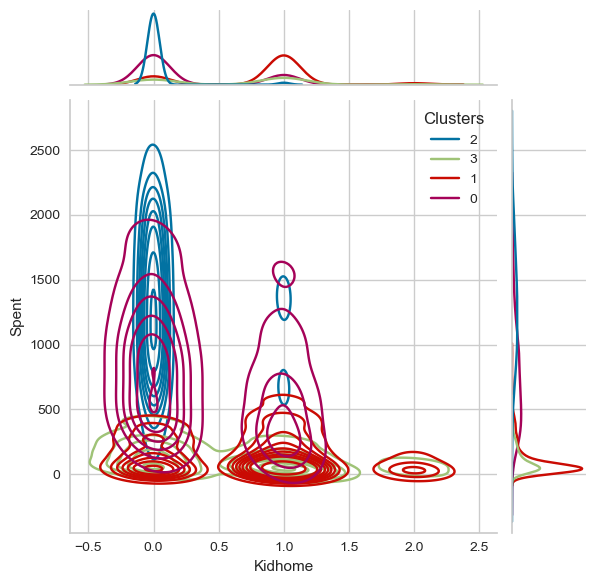

<Figure size 800x550 with 0 Axes>

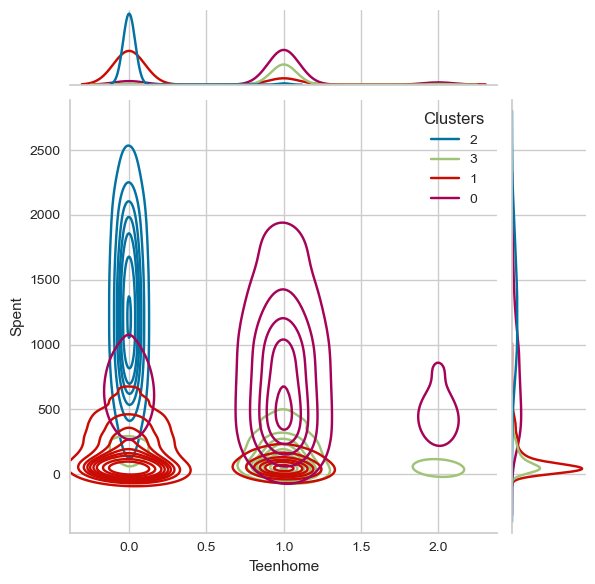

<Figure size 800x550 with 0 Axes>

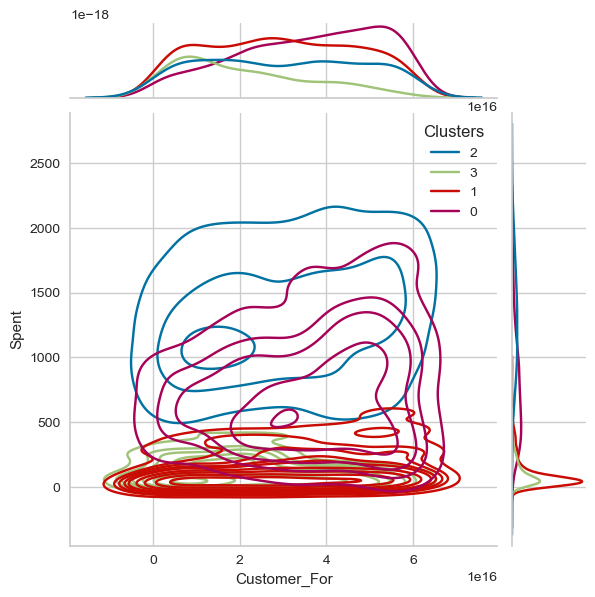

<Figure size 800x550 with 0 Axes>

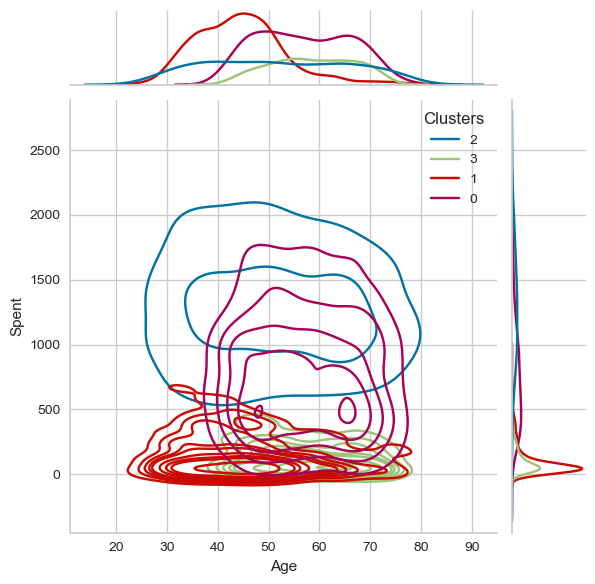

<Figure size 800x550 with 0 Axes>

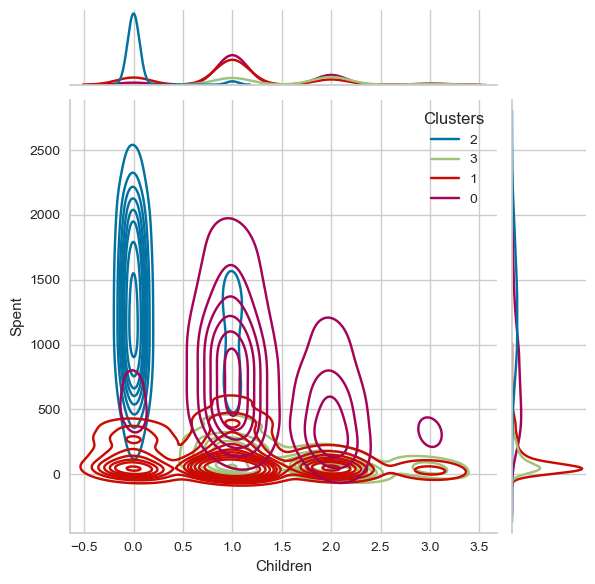

<Figure size 800x550 with 0 Axes>

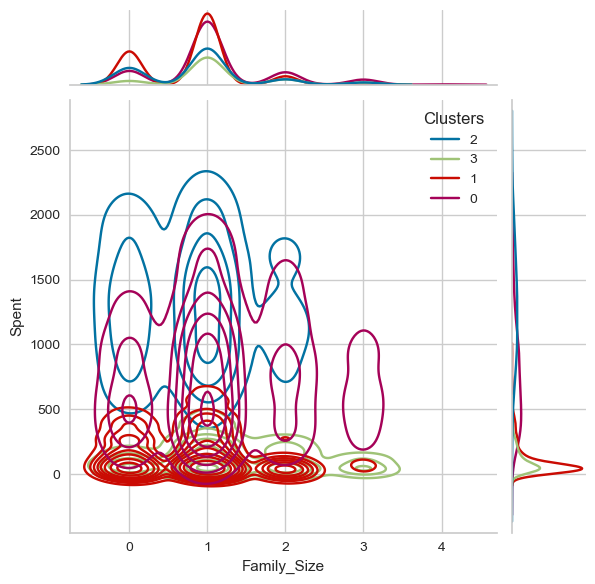

<Figure size 800x550 with 0 Axes>

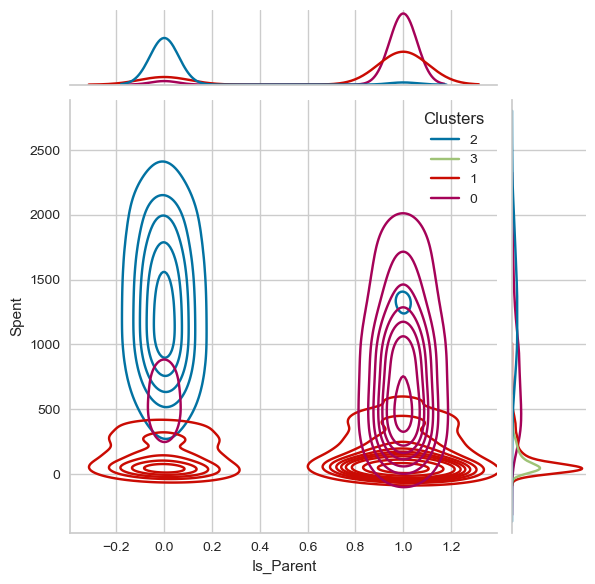

<Figure size 800x550 with 0 Axes>

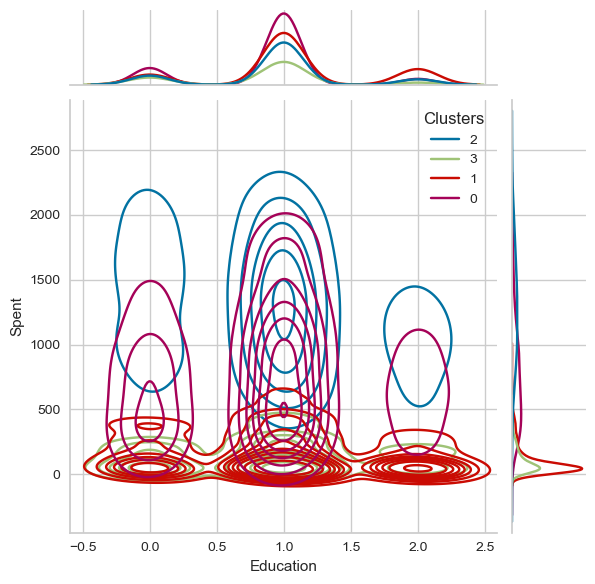

<Figure size 800x550 with 0 Axes>

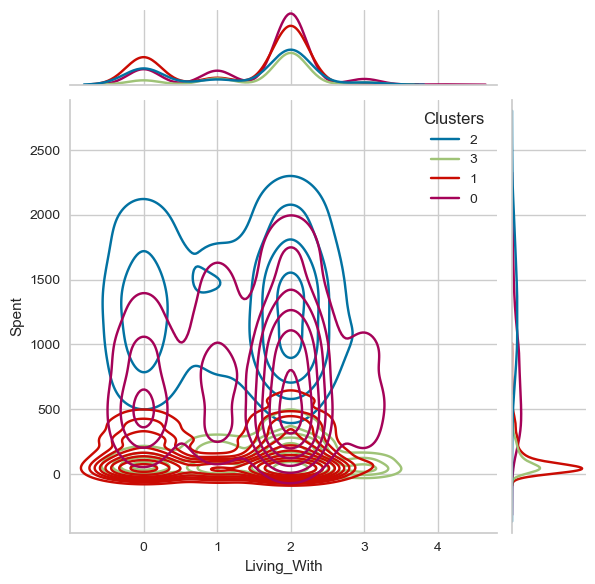

In [89]:
personal_info = ["Kidhome", "Teenhome", "Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education", "Living_With"]

# Loop through each personal information feature
for i in personal_info:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue=data["Clusters"], kind="kde")
    plt.show()
